In [310]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import power_transform, LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,auc, roc_auc_score,roc_curve
from sklearn.feature_selection import RFE

In [271]:
df = pd.read_csv("~/Desktop/Practice/Sonar/data.csv", header=None)

In [272]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,0.3108,0.2933,0.2275,0.0994,0.1801,0.2200,0.2732,0.2862,0.2034,0.1740,0.4130,0.6879,0.8120,0.8453,0.8919,0.9300,0.9987,1.0000,0.8104,0.6199,0.6041,0.5547,0.4160,0.1472,0.0849,0.0608,0.0969,0.1411,0.1676,0.1200,0.1201,0.1036,0.1977,0.1339,0.0902,0.1085,0.1521,0.1363,0.0858,0.0290,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,0.3085,0.3425,0.2990,0.1402,0.1235,0.1534,0.1901,0.2429,0.2120,0.2395,0.3272,0.5949,0.8302,0.9045,0.9888,0.9912,0.9448,1.0000,0.9092,0.7412,0.7691,0.7117,0.5304,0.2131,0.0928,0.1297,0.1159,0.1226,0.1768,0.0345,0.1562,0.0824,0.1149,0.1694,0.0954,0.0080,0.0790,0.1255,0.0647,0.0179,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,0.2716,0.2374,0.1878,0.0983,0.0683,0.1503,0.1723,0.2339,0.1962,0.1395,0.3164,0.5888,0.7631,0.8473,0.9424,0.9986,0.9699,1.0000,0.8630,0.6979,0.7717,0.7305,0.5197,0.1786,0.1098,0.1446,0.1066,0.1440,0.1929,0.0325,0.1490,0.0328,0.0537,0.1309,0.0910,0.0757,0.1059,0.1005,0.0535,0.0235,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,0.2898,0.2812,0.1578,0.0273,0.0673,0.1444,0.2070,0.2645,0.2828,0.4293,0.5685,0.6990,0.7246,0.7622,0.9242,1

#### From above we can see that there are 208 columns and 61 rows in the dataset

In [273]:
Rows, Columns = df.shape
print("There are {} number of rows and {} number of columns in the dataset".format(Rows, Columns))

There are 208 number of rows and 61 number of columns in the dataset


In [274]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,0.556525,0.518900,0.440550,0.434900,0.424350,0.387525,0.384250,0.324525,0.271750,0.231550,0.200375,0.154425,0.120100,0.0685

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [276]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

from above we can see that there are no missing values in the dataset

In [277]:
for i in df.columns:
    if df[i].isnull().sum() >= 1:
        print(ds[i])
    else:
        No_missing = "No Missing values in the dataset"
    
print(No_missing)

No Missing values in the dataset


In [278]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1:]

In [279]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [280]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predlr = lr.predict(X_test)
print(accuracy_score(Y_test, predlr))

0.8571428571428571


from above we can see that we are getting 85% accuracy lets see if it is overfitting or not using cross validation score

In [281]:
score = cross_val_score(lr, X, Y, cv = 5)
score = score.mean()
print(score)

0.6300813008130082


In [282]:
df.skew()

0     2.131088
1     2.155644
2     2.652518
3     3.401697
4     2.018141
5     1.248166
6     0.970820
7     1.481107
8     1.633870
9     1.281258
10    0.987813
11    0.588681
12    0.736584
13    1.022369
14    0.763964
15    0.694671
16    0.654480
17    0.525845
18    0.283182
19   -0.085331
20   -0.252741
21   -0.392289
22   -0.594350
23   -0.691861
24   -0.788909
25   -0.671580
26   -0.627843
27   -0.615447
28   -0.442007
29   -0.132390
30    0.259797
31    0.313420
32    0.423864
33    0.563296
34    0.591654
35    0.619868
36    0.676994
37    1.033366
38    0.908835
39    0.861280
40    0.863526
41    0.860110
42    0.909317
43    1.235086
44    1.366839
45    1.706674
46    1.790155
47    1.277722
48    1.273385
49    1.761714
50    2.716060
51    2.093976
52    1.060572
53    1.093090
54    1.789946
55    1.780805
56    1.653090
57    2.098330
58    1.737506
59    2.775754
dtype: float64

So from above we can see that our model is overfitting

lets see the outliers in the dataset

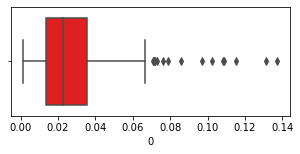

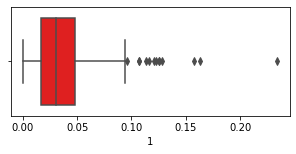

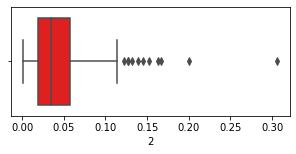

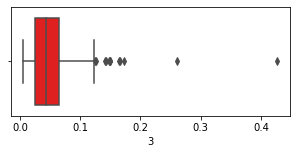

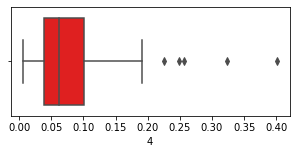

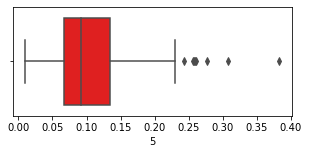

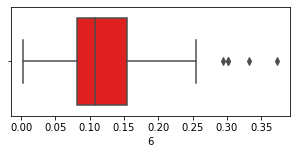

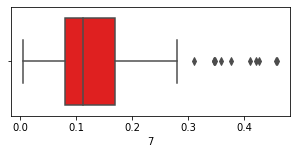

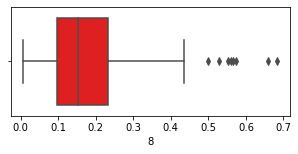

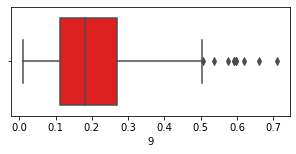

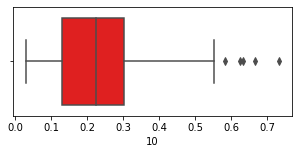

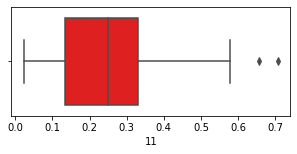

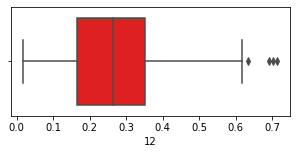

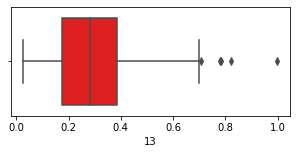

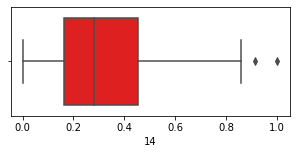

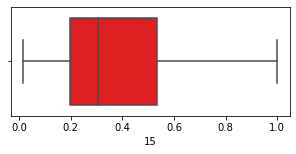

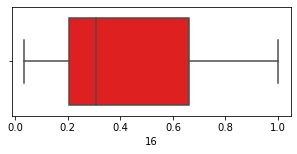

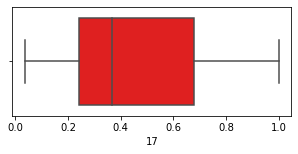

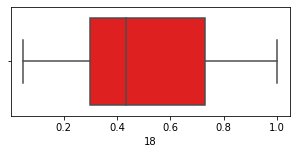

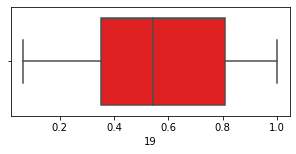

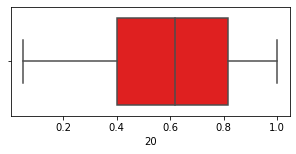

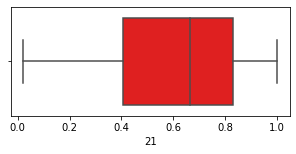

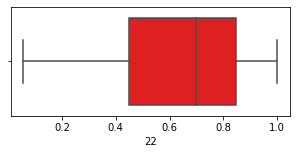

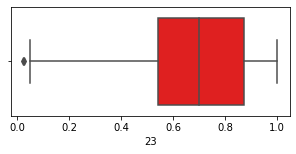

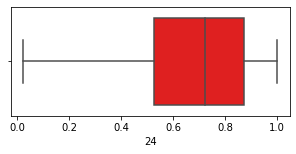

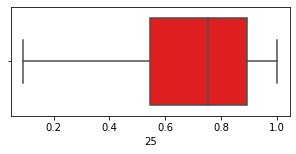

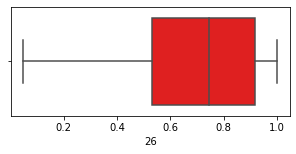

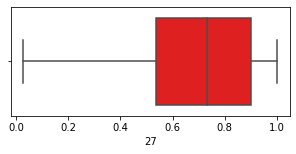

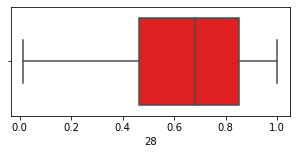

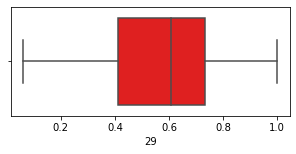

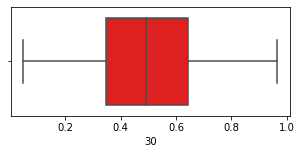

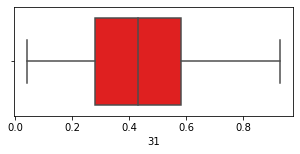

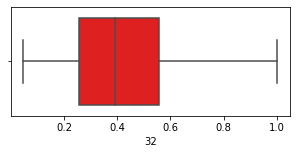

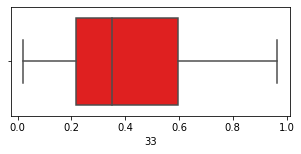

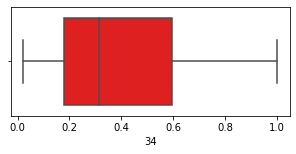

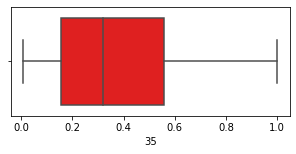

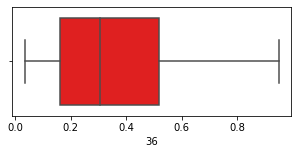

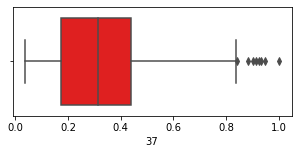

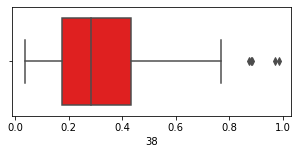

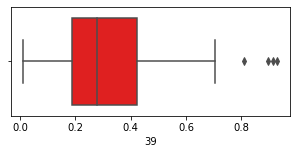

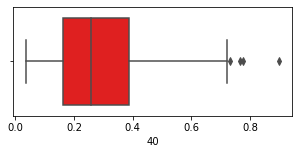

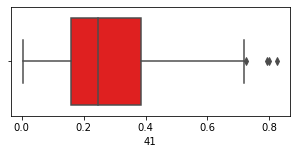

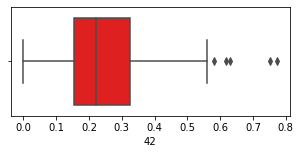

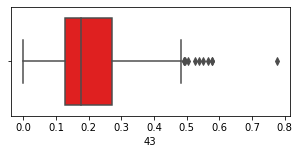

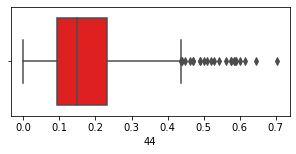

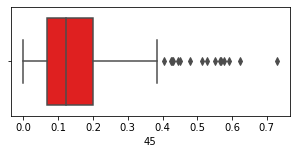

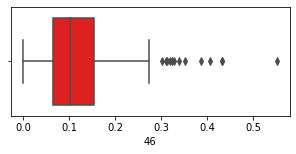

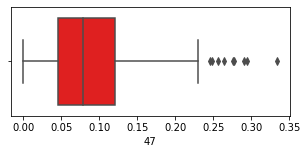

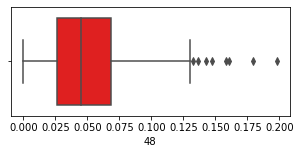

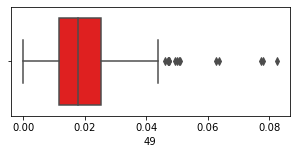

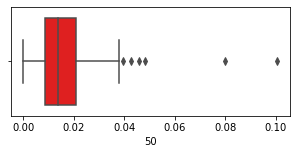

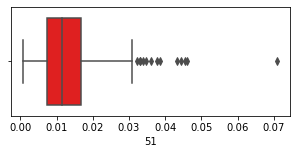

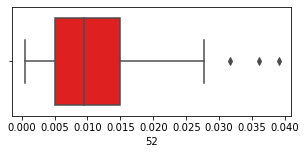

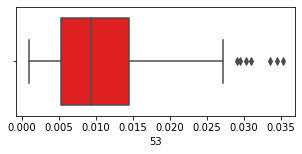

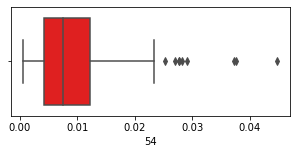

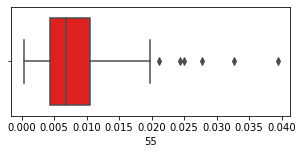

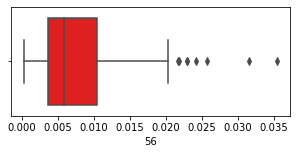

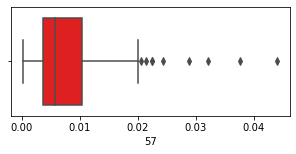

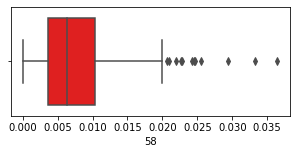

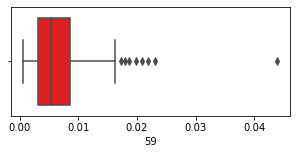

In [283]:
for i in df.columns.drop(60,1):
    plt.figure(figsize = (5,2))
    sns.boxplot(df[i], color='red')

from above we can see that there are some outliers in the dataset lets fix it

In [284]:
def remove_outliers(col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower = df[col].quantile(0.25)  - (IQR*3)
    upper = df[col].quantile(0.75) + (IQR*3)
    return (lower, upper)

In [285]:
for i in df.columns.drop(60,1):
    lower, upper = remove_outliers(i)
    if upper > 0:
        df.loc[df[i] >= upper, i] = upper
    elif lower < 0:
        df.loc[df[i] <= lower, i] = lower

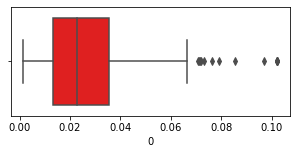

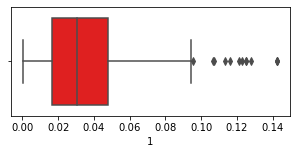

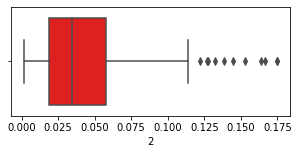

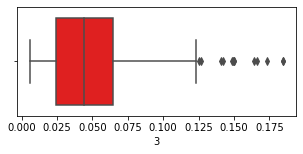

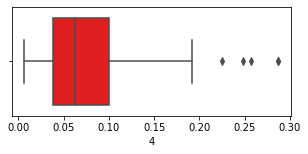

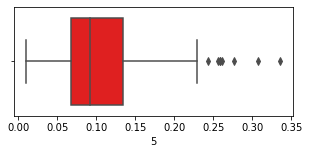

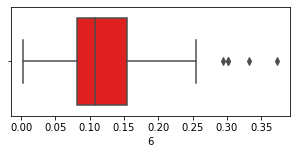

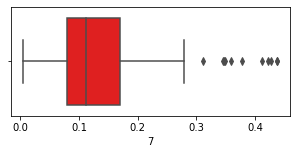

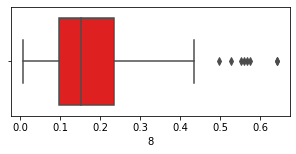

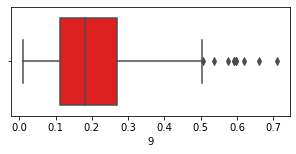

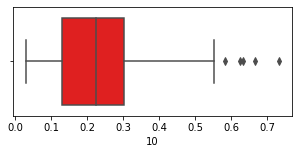

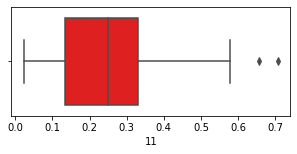

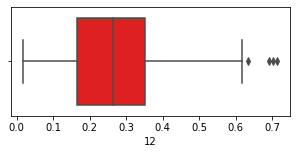

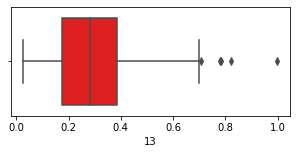

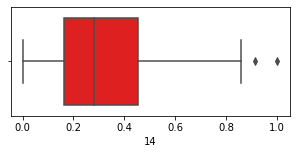

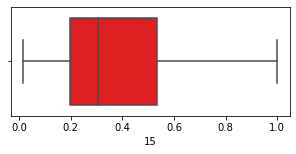

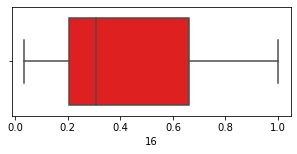

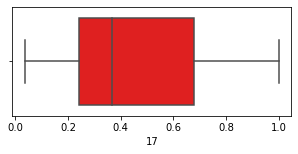

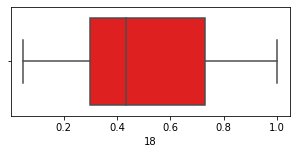

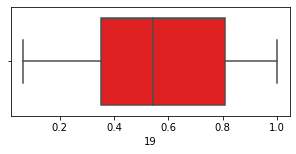

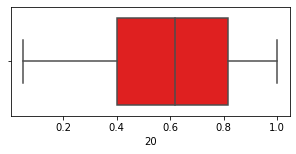

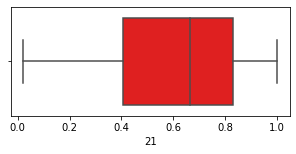

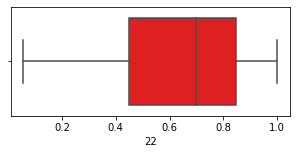

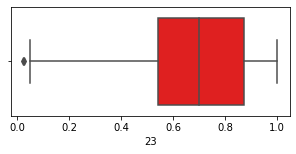

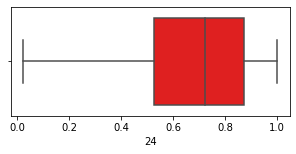

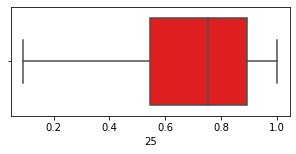

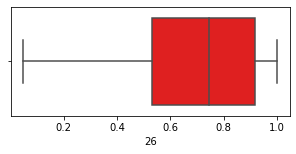

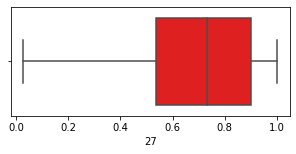

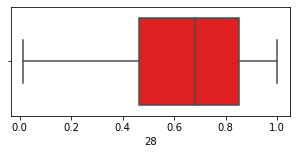

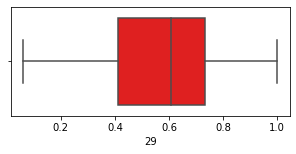

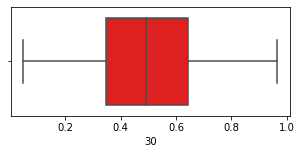

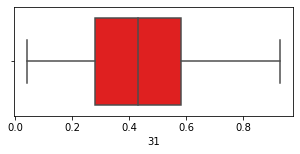

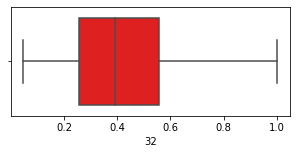

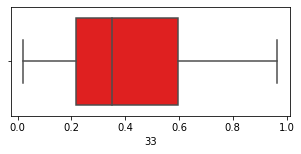

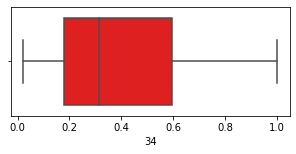

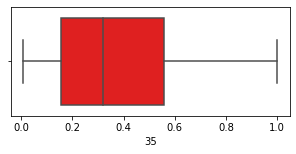

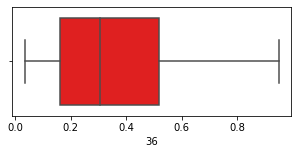

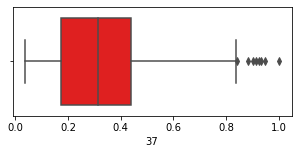

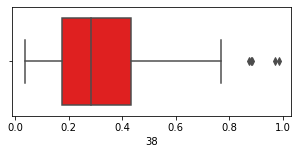

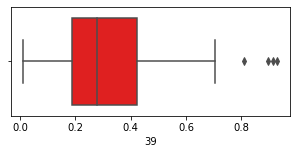

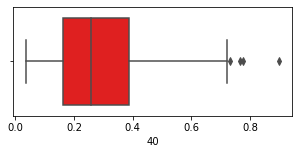

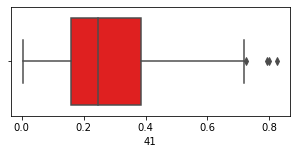

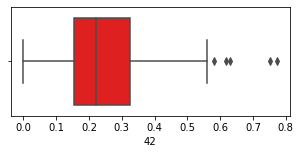

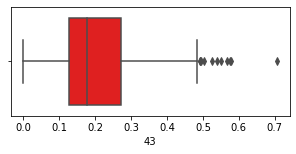

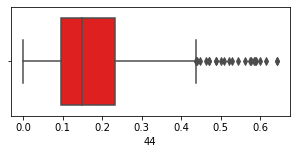

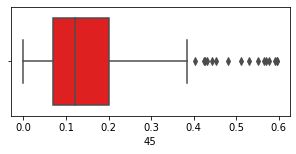

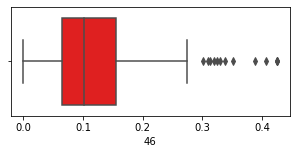

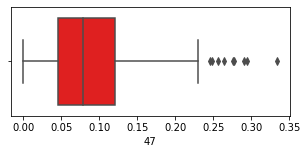

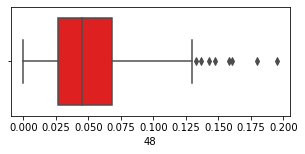

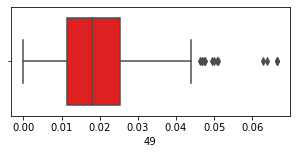

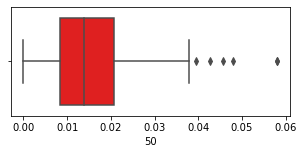

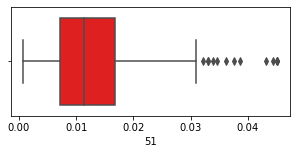

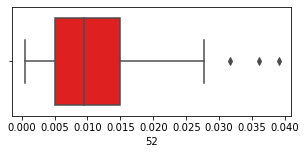

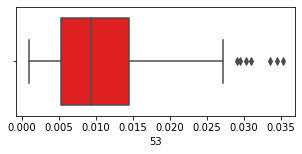

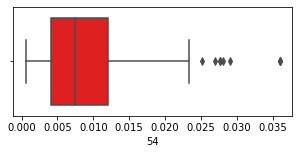

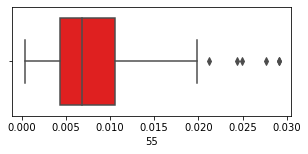

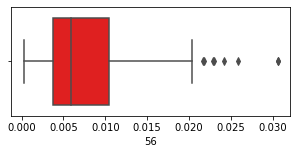

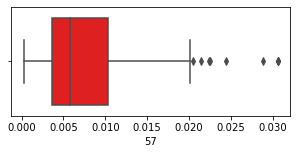

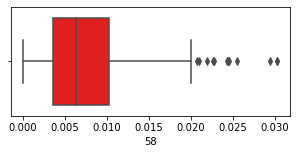

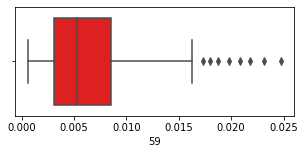

In [286]:
for i in df.columns.drop(60,1):
    plt.figure(figsize = (5,2))
    sns.boxplot(df[i], color='red')

#### Now lets check the skewness of the dataset

In [287]:
for i in df.columns.drop(60, 1):
    if df[i].skew() > 0.5:
        df[i] = np.cbrt(df[i])
    elif df[i].skew() > -0.5:
        df[i] = np.cbrt(df[i])

In [314]:
le = LabelEncoder()
target = le.fit_transform(df[60])

In [315]:
X = df.iloc[:,:-1]
Y = target

In [316]:
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [317]:
lr = LogisticRegression()
lr.fit(X_train ,Y_train)
pred = lr.predict(X_test)
print(accuracy_score(Y_test, pred))

0.9047619047619048


lets now see the cross validation score

In [318]:
score = cross_val_score(lr, X, Y, cv =5)
score = score.mean()
print(score)

0.6449477351916376


so we can see that accuracy has increased lets see the corelation to find th best columns

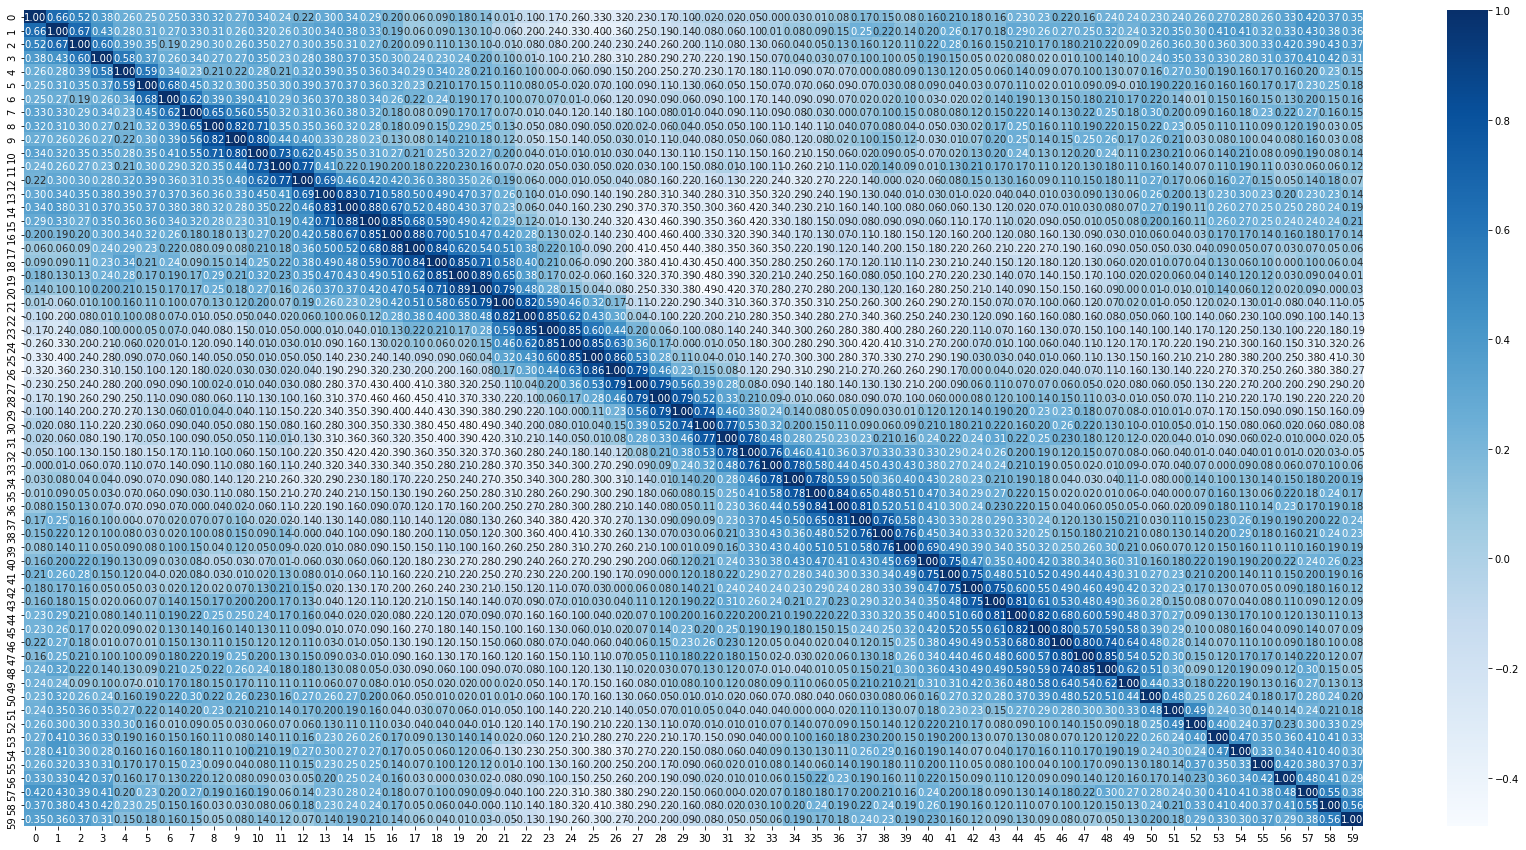

In [319]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), fmt='.2f', cmap='Blues', annot=True)

from above figure we can see that some column has low Correlation so we will remove those columns and use the best columns

In [320]:
rfc = RandomForestClassifier()

In [321]:
rfe = RFE(estimator=rfc, n_features_to_select=20, step=1)
rfe = rfe.fit(X_train, Y_train)
print('Chosen best 5 feature by rfe:',X_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Int64Index([3, 8, 9, 10, 11, 12, 16, 17, 20, 26, 27, 30, 35, 36, 42, 44, 45,
            47, 48, 51],
           dtype='int64')


In [322]:
rfe_col=X_train.columns[rfe.support_].values.tolist()

In [323]:
rfe_col

[3, 8, 9, 10, 11, 12, 16, 17, 20, 26, 27, 30, 35, 36, 42, 44, 45, 47, 48, 51]

In [324]:
X = X.filter(rfe_col)

In [325]:
X_train ,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [326]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred = lr.predict(X_test)
print(accuracy_score(Y_test, pred))

0.9047619047619048


In [327]:
score = cross_val_score(lr, X, Y, cv =5)
score =score.mean()
print(score)

0.7117305458768872


In [328]:
rfc.fit(X_train ,Y_train)
predrfc = rfc.predict(X_test)
print(accuracy_score(Y_test, predrfc))
score = cross_val_score(rfc, X, Y, cv = 5)
score = score.mean()
print(score)

0.9523809523809523
0.7456445993031359


so we can see that we have increase the accuracy score of the model

In [329]:
xgb = XGBClassifier(verbosity = 0 )
xgb.fit(X_train, Y_train)
pred = xgb.predict(X_test)
accuracy_score(Y_test, pred)
score = cross_val_score(xgb, X, Y, cv = 5)
score = score.mean()
score

0.7501742160278745

In [330]:
xgbrfc = XGBRFClassifier(verbosity = 0)
xgbrfc.fit(X_train, Y_train)
pred = xgbrfc.predict(X_test)
print(accuracy_score(Y_test, pred))
score = cross_val_score(xgbrfc, X, Y, cv = 5)
score = score.mean()
score

0.9047619047619048


0.6786295005807201

In [331]:
print("Random Forest Classifier")
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
pred = rfc.predict(X_test)
print("Accuracy Score: ", accuracy_score(Y_test, pred))
print("Confusion Matrix: ", confusion_matrix(Y_test, pred))
print("Classification Report: ", classification_report(Y_test, pred))
score = cross_val_score(rfc, X, Y, cv = 5)
score = score.mean()
print("Cross Validation Score: ", score)

Random Forest Classifier
Accuracy Score:  0.9523809523809523
Confusion Matrix:  [[12  1]
 [ 0  8]]
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.89      1.00      0.94         8

    accuracy                           0.95        21
   macro avg       0.94      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21

Cross Validation Score:  0.7313588850174216


from looking at the Confusion matrix we can see that our model is performing very good 

lets check the ROC curve for the same

In [332]:
fpr, tpr, threshold = roc_curve(Y_test, pred)
roc_auc = auc(fpr, tpr)

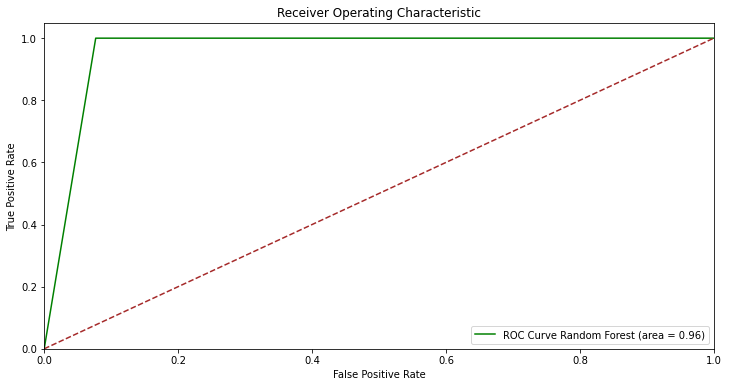

In [336]:
plt.figure(figsize = (12,6))
plt.plot(fpr, tpr, color='green', label = "ROC Curve Random Forest (area = %0.2f)" %roc_auc)
plt.plot([0,1],[0,1], color='brown', linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")

## from here we can see that our model is really performing well and has a curve are as 96%

## we can further increase it by using hyperparameter tuning